# Elder Force Index (EFI)

https://library.tradingtechnologies.com/trade/chrt-ti-elder-force-index.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'HINDUNILVR.NS'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,1930.000000,1939.900024,1918.00,1936.550049,1832.502930,543035
2020-01-02 00:00:00+05:30,1940.000000,1952.599976,1930.00,1938.050049,1833.922485,663275
2020-01-03 00:00:00+05:30,1937.900024,1940.000000,1918.75,1927.449951,1823.891968,1598825
2020-01-06 00:00:00+05:30,1927.349976,1929.400024,1911.25,1915.449951,1812.536743,683129
2020-01-07 00:00:00+05:30,1919.250000,1931.000000,1918.00,1920.699951,1817.504639,808935


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-26 00:00:00+05:30,2620.949951,2637.850098,2606.750000,2617.449951,2617.449951,605144
2022-12-27 00:00:00+05:30,2625.000000,2634.899902,2575.250000,2593.250000,2593.250000,870960
2022-12-28 00:00:00+05:30,2593.000000,2603.100098,2578.100098,2583.600098,2583.600098,822651
2022-12-29 00:00:00+05:30,2580.250000,2583.300049,2539.399902,2568.050049,2568.050049,1345863
2022-12-30 00:00:00+05:30,2579.949951,2586.449951,2555.199951,2561.050049,2561.050049,696432


In [4]:
n = 14
df['EMA'] = df['Adj Close'].ewm(ignore_na=False,span=n,min_periods=n,adjust=True).mean()

In [5]:
EFI = df['Adj Close'] - df['Adj Close'].shift() * df['Volume']

In [6]:
df['EFI'] = EFI.ewm(ignore_na=False,span=n,min_periods=n,adjust=True).mean()

In [7]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,EMA,EFI
Date,,,,,,,,
2020-01-01 00:00:00+05:30,1930.000000,1939.900024,1918.000000,1936.550049,1832.502930,543035,NaN,NaN
2020-01-02 00:00:00+05:30,1940.000000,1952.599976,1930.000000,1938.050049,1833.922485,663275,NaN,NaN
2020-01-03 00:00:00+05:30,1937.900024,1940.000000,1918.750000,1927.449951,1823.891968,1598825,NaN,NaN
2020-01-06 00:00:00+05:30,1927.349976,1929.400024,1911.250000,1915.449951,1812.536743,683129,NaN,NaN
2020-01-07 00:00:00+05:30,1919.250000,1931.000000,1918.000000,1920.699951,1817.504639,808935,NaN,NaN
2020-01-08 00:00:00+05:30,1910.000000,1936.050049,1906.449951,1929.349976,1825.689941,1889685,NaN,NaN
2020-01-09 00:00:00+05:30,1941.550049,1947.300049,1931.000000,1935.050049,1831.083740,1544334,NaN,NaN
2020-01-10 00:00:00+05:30,1940.900024,1957.500000,1931.650024,1954.000000,1849.015381,1003336,NaN,NaN
2020-01-13 00:00:00+05:30,1961.000000,1997.849976,1957.000000,1994.849976,1887.670898,2040089,NaN,NaN


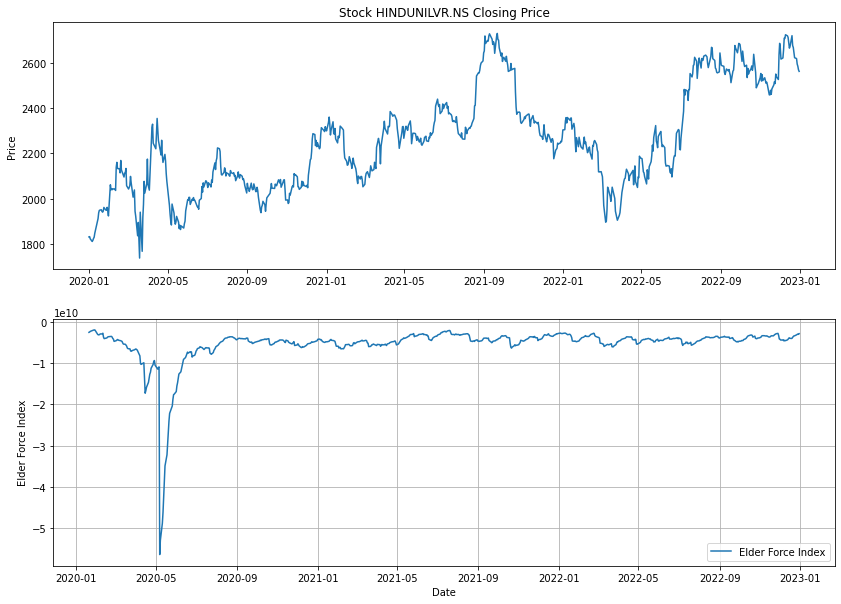

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['EFI'], label='Elder Force Index')
ax2.grid()
ax2.set_ylabel('Elder Force Index')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Elder Force Index

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,EMA,EFI,VolumePositive
0,18261.770833,1930.000000,1939.900024,1918.00,1936.550049,1832.502930,543035,NaN,NaN,False
1,18262.770833,1940.000000,1952.599976,1930.00,1938.050049,1833.922485,663275,NaN,NaN,False
2,18263.770833,1937.900024,1940.000000,1918.75,1927.449951,1823.891968,1598825,NaN,NaN,False
3,18266.770833,1927.349976,1929.400024,1911.25,1915.449951,1812.536743,683129,NaN,NaN,False
4,18267.770833,1919.250000,1931.000000,1918.00,1920.699951,1817.504639,808935,NaN,NaN,False


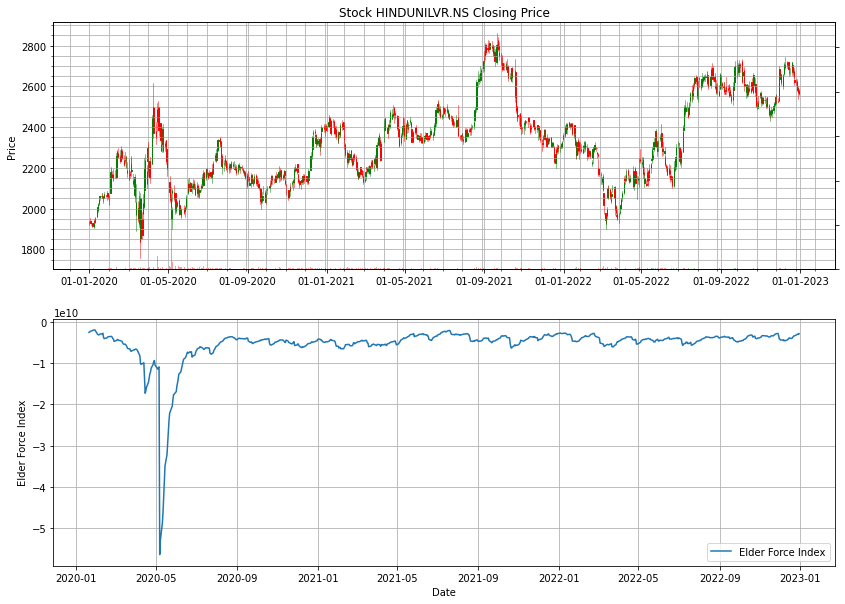

In [11]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['EFI'], label='Elder Force Index')
ax2.grid()
ax2.set_ylabel('Elder Force Index')
ax2.set_xlabel('Date')
ax2.legend(loc='best')